# This programe uses the dual moving average crossover to determine when to buy and sell stock


In [3]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [4]:
# importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [85]:
# Load the data
data = yf.download('AAPL', start = '2006-01-01', end = '2011-01-01')

[*********************100%***********************]  1 of 1 completed


In [86]:
# Checking data

In [87]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03 00:00:00-05:00,2.585000,2.669643,2.580357,2.669643,2.275651,807234400
2006-01-04 00:00:00-05:00,2.683214,2.713571,2.660714,2.677500,2.282349,619603600
2006-01-05 00:00:00-05:00,2.672500,2.675000,2.633929,2.656429,2.264388,449422400
2006-01-06 00:00:00-05:00,2.687500,2.739286,2.662500,2.725000,2.322838,704457600
2006-01-09 00:00:00-05:00,2.740357,2.757143,2.705000,2.716071,2.315227,675040800


In [88]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-27 00:00:00-05:00,11.530357,11.622857,11.482857,11.595714,9.884393,249816000
2010-12-28 00:00:00-05:00,11.639643,11.666429,11.609286,11.623929,9.908446,175924000
2010-12-29 00:00:00-05:00,11.650714,11.658929,11.610714,11.617500,9.902966,163139200
2010-12-30 00:00:00-05:00,11.624286,11.625357,11.537500,11.559286,9.853344,157494400
2010-12-31 00:00:00-05:00,11.533929,11.552857,11.475357,11.520000,9.819854,193508000


In [89]:
data.shape

(1259, 6)

In [90]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [91]:
# Visualise the data

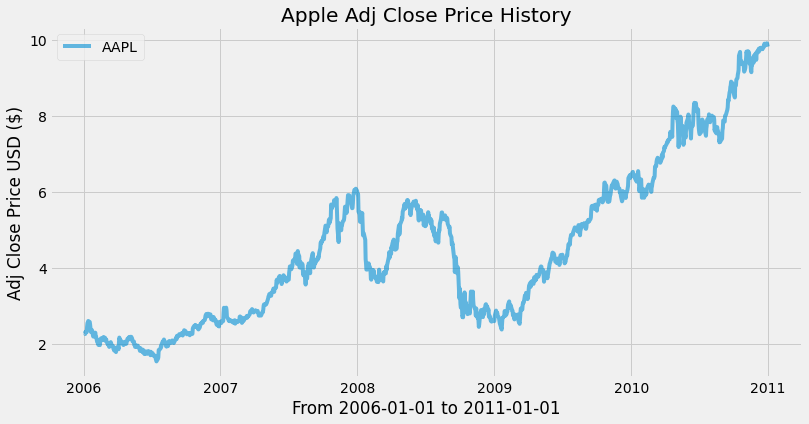

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label = 'AAPL', alpha=0.6)
plt.title('Apple Adj Close Price History')
plt.xlabel('From 2006-01-01 to 2011-01-01')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [95]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = data['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
Date,
2006-01-03 00:00:00-05:00,NaN
2006-01-04 00:00:00-05:00,NaN
2006-01-05 00:00:00-05:00,NaN
2006-01-06 00:00:00-05:00,NaN
2006-01-09 00:00:00-05:00,NaN
...,...
2010-12-27 00:00:00-05:00,9.628201
2010-12-28 00:00:00-05:00,9.645899
2010-12-29 00:00:00-05:00,9.664419


In [96]:
# Create a simple moving moving 100 day avarage
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = data['Adj Close'].rolling(100).mean()
SMA100

,Adj Close
Date,
2006-01-03 00:00:00-05:00,NaN
2006-01-04 00:00:00-05:00,NaN
2006-01-05 00:00:00-05:00,NaN
2006-01-06 00:00:00-05:00,NaN
2006-01-09 00:00:00-05:00,NaN
...,...
2010-12-27 00:00:00-05:00,8.868769
2010-12-28 00:00:00-05:00,8.888182
2010-12-29 00:00:00-05:00,8.908032


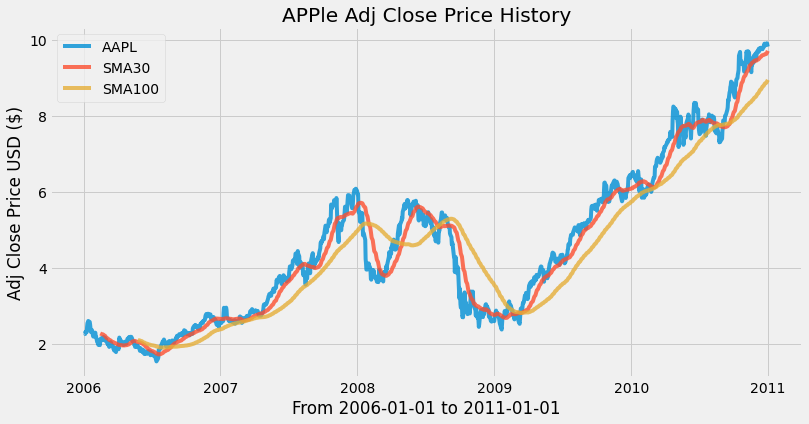

In [98]:
# Visualising data
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label = 'AAPL', alpha=0.8)
plt.plot(SMA30['Adj Close'], label = 'SMA30', alpha=0.8)
plt.plot(SMA100['Adj Close'], label = 'SMA100', alpha=0.8)
plt.title('APPle Adj Close Price History')
plt.xlabel('From 2006-01-01 to 2011-01-01')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [99]:
# Storing data
df = pd.DataFrame()
df['AAPL'] = data['Adj Close']
df['SMA30'] = SMA30['Adj Close']
df['SMA100'] = SMA100['Adj Close']
df


,AAPL,SMA30,SMA100
Date,,,
2006-01-03 00:00:00-05:00,2.275651,NaN,NaN
2006-01-04 00:00:00-05:00,2.282349,NaN,NaN
2006-01-05 00:00:00-05:00,2.264388,NaN,NaN
2006-01-06 00:00:00-05:00,2.322838,NaN,NaN
2006-01-09 00:00:00-05:00,2.315227,NaN,NaN
...,...,...,...
2010-12-27 00:00:00-05:00,9.884393,9.628201,8.868769
2010-12-28 00:00:00-05:00,9.908446,9.645899,8.888182
2010-12-29 00:00:00-05:00,9.902966,9.664419,8.908032


Creating a function to signal when to buy and sell

In [104]:
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = 0 # Not assigned, 1 = sell, 0 = buy  

  # print(len(data))
  for i in range(len(data)):
    # print(i)
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)



Store the buy and sell data 

In [105]:
buy_sell = buy_sell(df)
df['Buy_Signal_price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

In [106]:
df

,AAPL,SMA30,SMA100,Buy_Signal_price,Sell_Signal_Price
Date,,,,,
2006-01-03 00:00:00-05:00,2.275651,NaN,NaN,NaN,NaN
2006-01-04 00:00:00-05:00,2.282349,NaN,NaN,NaN,NaN
2006-01-05 00:00:00-05:00,2.264388,NaN,NaN,NaN,NaN
2006-01-06 00:00:00-05:00,2.322838,NaN,NaN,NaN,NaN
2006-01-09 00:00:00-05:00,2.315227,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2010-12-27 00:00:00-05:00,9.884393,9.628201,8.868769,NaN,NaN
2010-12-28 00:00:00-05:00,9.908446,9.645899,8.888182,NaN,NaN
2010-12-29 00:00:00-05:00,9.902966,9.664419,8.908032,NaN,NaN


Visualing the data and the stratergy to buy and sell stock

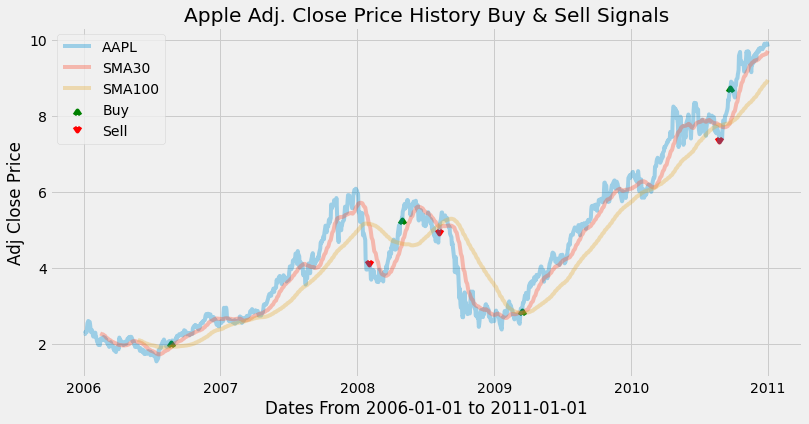

In [110]:
plt.figure(figsize = (12, 6))
plt.plot(df['AAPL'], label='AAPL', alpha=0.35)
plt.plot(df['SMA30'], label = 'SMA30', alpha=0.35)
plt.plot(df['SMA100'], label = 'SMA100', alpha=0.35)
plt.scatter(df.index, df['Buy_Signal_price'], label='Buy', marker = 6, color = 'green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell', marker = 7, color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel("Dates From 2006-01-01 to 2011-01-01")
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()

In [111]:
df

,AAPL,SMA30,SMA100,Buy_Signal_price,Sell_Signal_Price
Date,,,,,
2006-01-03 00:00:00-05:00,2.275651,NaN,NaN,NaN,NaN
2006-01-04 00:00:00-05:00,2.282349,NaN,NaN,NaN,NaN
2006-01-05 00:00:00-05:00,2.264388,NaN,NaN,NaN,NaN
2006-01-06 00:00:00-05:00,2.322838,NaN,NaN,NaN,NaN
2006-01-09 00:00:00-05:00,2.315227,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2010-12-27 00:00:00-05:00,9.884393,9.628201,8.868769,NaN,NaN
2010-12-28 00:00:00-05:00,9.908446,9.645899,8.888182,NaN,NaN
2010-12-29 00:00:00-05:00,9.902966,9.664419,8.908032,NaN,NaN
